### Importing Libraries

In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import speech_recognition as sr


In [ ]:
# !pip install SpeechRecognition
# !pip install PyAudio
# !pip install PocketSphinx
# !pip install git+https://github.com/openai/whisper.git
# !pip install --upgrade --no-deps --force-reinstall git+https://github.com/openai/whisper.git
# !pip install ffmpeg

### Speech to Text

In [2]:
r = sr.Recognizer()

In [3]:
sr.Microphone.list_microphone_names()

['Microsoft Sound Mapper - Input',
 'Microphone Array (AMD Audio Dev',
 'Microsoft Sound Mapper - Output',
 'Speaker (Realtek(R) Audio)',
 'Primary Sound Capture Driver',
 'Microphone Array (AMD Audio Device)',
 'Primary Sound Driver',
 'Speaker (Realtek(R) Audio)',
 'Speaker (Realtek(R) Audio)',
 'Microphone Array (AMD Audio Device)',
 'Microphone (Realtek HD Audio Mic input)',
 'Speakers 1 (Realtek HD Audio output with HAP)',
 'Speakers 2 (Realtek HD Audio output with HAP)',
 'PC Speaker (Realtek HD Audio output with HAP)',
 'Headphones 1 (Realtek HD Audio 2nd output with HAP)',
 'Headphones 2 (Realtek HD Audio 2nd output with HAP)',
 'PC Speaker (Realtek HD Audio 2nd output with HAP)',
 'Microphone Array 1 (AMDAfdInstall Wave Microphone - 0)',
 'Microphone Array 2 (AMDAfdInstall Wave Microphone - 0)']

In [4]:
mic = sr.Microphone()

In [5]:
# Using Google Cloud API
with mic as audio_file:
    print("الرجاء البدأ بالتحدث")

    r.adjust_for_ambient_noise(audio_file)
    audio = r.listen(audio_file)

    try:
        text = r.recognize_google(audio, language='ar-EG')
        print(text + " :لقد قلت")
        
    except Exception as e:
        print('Error: ' + str(e))


الرجاء البدأ بالتحدث
result2:
{   'alternative': [{'confidence': 0.92682546, 'transcript': 'مرحبا'}],
    'final': True}
مرحبا :لقد قلت


### Text to Image

In [6]:
text

'مرحبا'

In [7]:
# sentence = 'مرحبا! انا اسمي نورا'
sentence = text
sentence

'مرحبا'

In [2]:
sentence = "كم عمرك"

#### Text Cleaning

In [3]:
special_characters = ['@', '!', '؟', '$', '%', '^', '*', '-', '_']

In [4]:
# Special Characters Removal
for sp in special_characters:
    sentence = sentence.replace(sp, '')

In [5]:
print(sentence)

كم عمرك


In [6]:
words = sentence.split(' ')

In [7]:
print(words)

['كم', 'عمرك']


#### Loading Needed Data

In [8]:
imgdir = 'data\Arabic\ArASL_Database_54K_Final\ArASL_Database_54K_Final'

In [9]:
ArSL = [] # Conatins random image for each letter

In [10]:
for cla in os.listdir(imgdir):
    p = imgdir + '\\' + cla
    imgName = random.choice(os.listdir(p))
    imPath = p + '\\' + imgName
    image = cv2.imread(imPath)
    ArSL.append(image)

In [13]:
# Loading the Arabic Guide
guide = pd.read_csv('data\Arabic\Arabic_Letters_Guide.csv')

In [14]:
guide.head(3)

,Phonteics,Index,Arabic_Letters
0,ain,0,ع
1,al,1,ال
2,aleff,2,ا


#### Encode

In [31]:
encoded = []

In [32]:
for word in words:
    list_code = []
    for letter in word:
        code = guide[guide['Arabic_Letters'] == letter]['Index'].values[0]#.iloc[0]
        print(code)
        list_code.append(code)
    encoded.append(list_code)

13
17
0
17
19
13


In [33]:
encoded

[[13, 17], [0, 17, 19, 13]]

#### Displaying Relevant Images

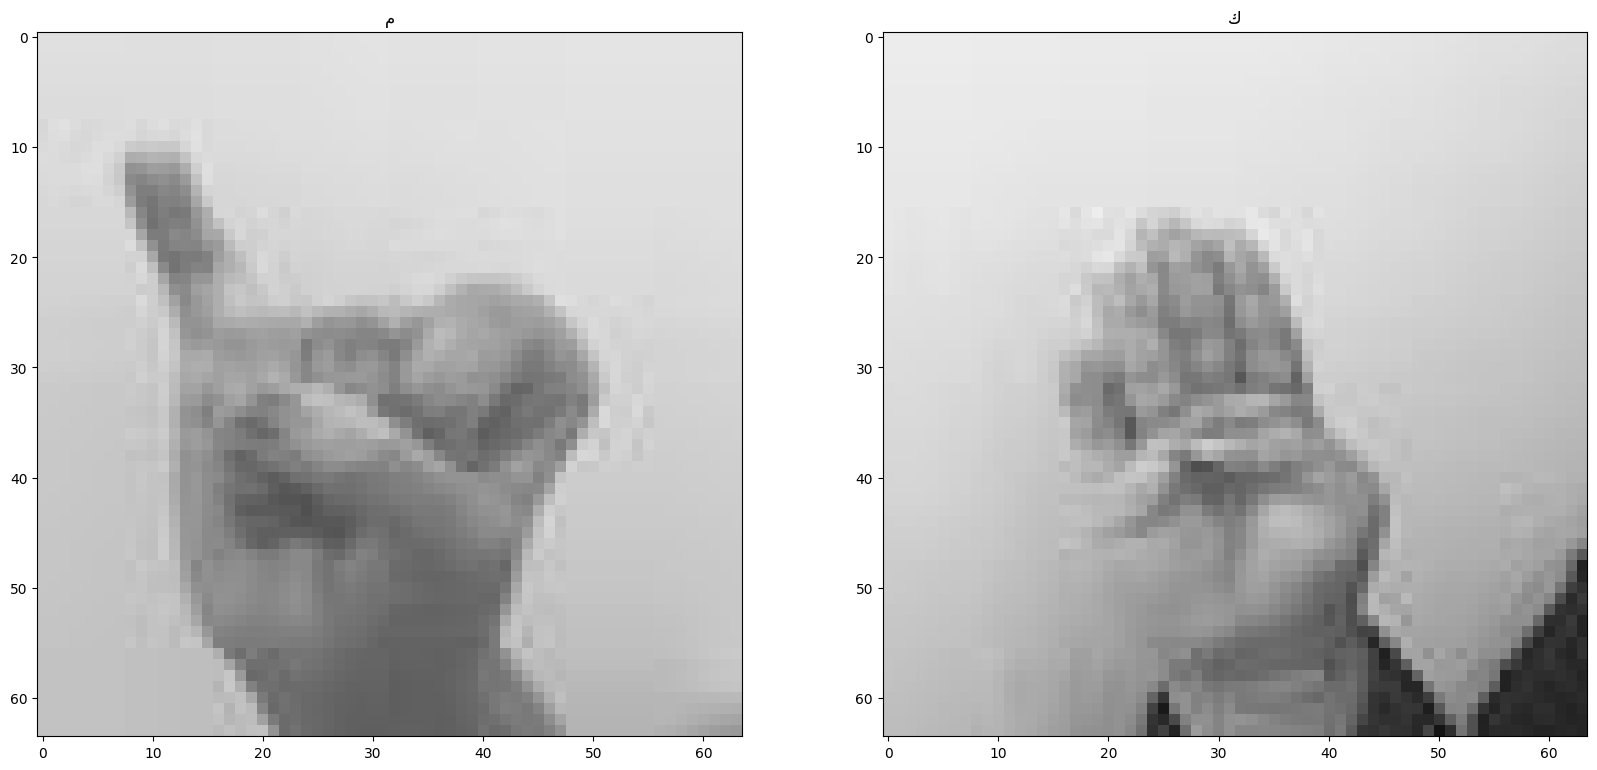

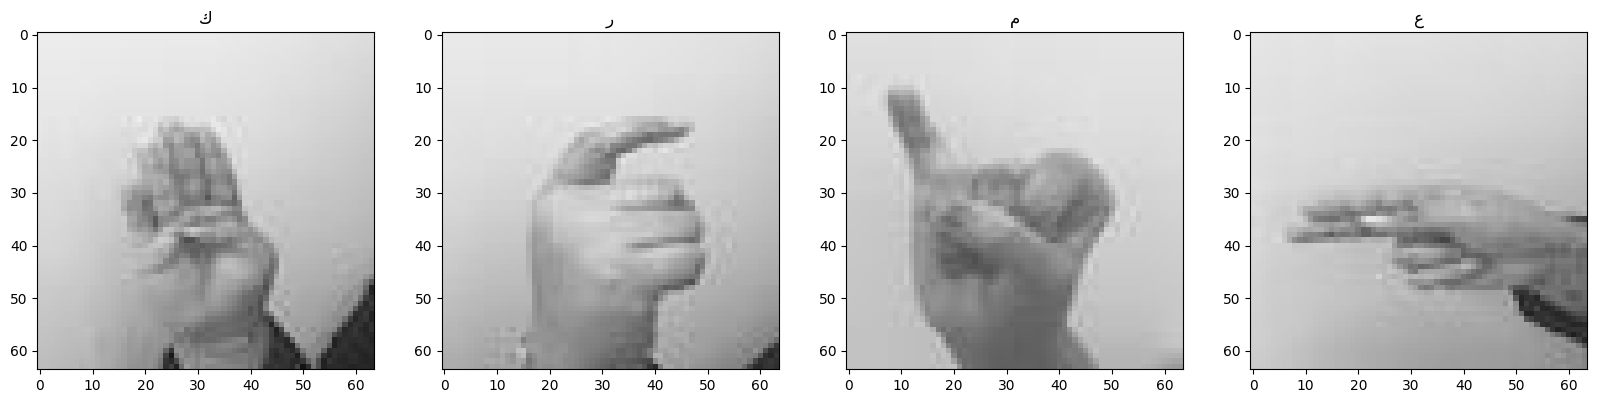

In [18]:
# Displaying the Images
for l1 in encoded:
    l1.reverse()
    fig, ax = plt.subplots(1, len(l1), figsize=(20, 20))
    for i in range(len(l1)):
        ax[i].imshow(ArSL[l1[i]], cmap='gray')
        ax[i].set_title(guide[guide['Index'] == l1[i]]['Arabic_Letters'].iloc[0])


In [16]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure
import customtkinter as ctk
import cv2
import random
# from Modern_GUI_Interface import ArSL


In [41]:
root = ctk.CTk()
root.title("Emdeing Images")

fig = Figure(figsize=(20,20))

for l1 in encoded:
    l1.reverse()
    ax = fig.subplots(1, len(l1))
    # fig, ax = plt.subplots(1, len(l1), figsize=(20, 20))
    for i in range(len(l1)):
        # ax = fig.add_subplot(111)
        ax[i].imshow(ArSL[l1[i]], cmap='gray')
        ax[i].set_title(guide[guide['Index'] == l1[i]]['Arabic_Letters'].iloc[0])
        # ax[i].imshow(ArSL[l1[i]], cmap='gray')
        # ax[i].set_title(guide[guide['Index'] == l1[i]]['Arabic_Letters'].iloc[0])


canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()

canvas.get_tk_widget().pack(side=ctk.TOP, fill=ctk.BOTH, expand=True)

root.mainloop()